## Problem

$$f(w_1, w_2) = 0.1w_1^2 + 2w_2^2 \;\;\;\;\;\;\;(1)$$

In [29]:
import numpy as np

### RMSprop

In [30]:
def df_w(w):
    """
    Thực hiện tính gradient của dw1 và dw2
    Arguments:
    W -- np.array [w1, w2]
    Returns:
    dW -- np.array [dw1, dw2], array chứa giá trị đạo hàm theo w1 và w2
    """
    #################### YOUR CODE HERE ####################


    dW = np.array([0.2*w[0], 4*w[1]])
    ########################################################

    return dW

In [36]:
def RMSProp(W, dW, lr, S, gamma):
    """
    Thực hiện thuật tóan RMSProp để update w1 và w2
    Arguments:
    W -- np.array: [w1, w2]
    dW -- np.array: [dw1, dw2], array chứa giá trị đạo hàm theo w1 và w2
    lr -- float: learning rate
    S -- np.array: [s1, s2] Exponentially weighted averages bình phương gradients
    gamma -- float: hệ số long-range average
    Returns:
    W -- np.array: [w1, w2] w1 và w2 sau khi đã update
    S -- np.array: [s1, s2] Exponentially weighted averages bình phương gradients sau khi đã cập nhật
    """
    epsilon = 1e-6
    #################### YOUR CODE HERE ####################
    S = gamma * S + (1-gamma) * (dW**2)

    W -=  ((lr/np.sqrt(S + epsilon)) *dW)
    ########################################################
    return W, S

In [37]:
def RMSProp(W, dW, lr, S, gamma):
    """
    Thực hiện thuật tóan RMSProp để update w1 và w2
    
    Arguments:
    W -- np.array: [w1, w2]
    dW -- np.array: [dw1, dw2], array chứa giá trị đạo hàm theo w1 và w2
    lr -- float: learning rate
    S -- np.array: [s1, s2] Exponentially weighted averages bình phương gradients
    gamma -- float: hệ số long-range average
    
    Returns:
    W -- np.array: [w1, w2] w1 và w2 sau khi đã update
    S -- np.array: [s1, s2] Exponentially weighted averages bình phương gradients sau khi đã cập nhật
    """
    epsilon = 1e-6  # Small constant to avoid division by zero
    
    # Update the exponentially weighted averages of the squared gradients
    S = gamma * S + (1 - gamma) * (dW ** 2)
    
    adapt_lr = lr / np.sqrt(S + epsilon)
    W = W - (adapt_lr * dW)
    
    return W, S


In [38]:
def train_p1(optimizer, lr, epochs):
    """
    Thực hiện tìm điểm minimum của function (1) dựa vào thuật toán
    được truyền vào từ optimizer
    Arguments:
    optimize : function thực hiện thuật toán optimization cụ thể
    lr -- float: learning rate
    epochs -- int: số lượng lần (epoch) lặp để tìm điểm minimum
    Returns:
    results -- list: list các cặp điểm [w1, w2] sau mỗi epoch (mỗi lần cập nhật)
    """
    # initial
    W = np.array([-5, -2], dtype=np.float32)
    S = np.array([0, 0], dtype=np.float32)
    results = [W]
    #################### YOUR CODE HERE ####################
    # Tạo vòng lặp theo số lần epochs
    # tìm gradient dW gồm dw1 và dw2
    # dùng thuật toán optimization cập nhật w1, w2, s1, s2
    # append cặp [w1, w2] vào list results
    for i in range(epochs):
        dW = df_w(W)
        W , S = optimizer(W , dW , lr , S , 0.9)
        results.append(W)

    ########################################################
    return results

In [45]:
results = train_p1(RMSProp, lr=0.3, epochs=30)
results 

[array([-5., -2.], dtype=float32),
 array([-4.05132145, -1.05131678]),
 array([-3.43519754, -0.59152343]),
 array([-2.95893693, -0.3294394 ]),
 array([-2.56546289, -0.17756482]),
 array([-2.22920552, -0.09163256]),
 array([-1.93626752, -0.04494499]),
 array([-1.67817686, -0.02081423]),
 array([-1.44934985, -0.00903559]),
 array([-1.24588199, -0.00364591]),
 array([-1.06490301, -0.00135351]),
 array([-9.04202260e-01, -4.56444431e-04]),
 array([-7.61996495e-01, -1.37562928e-04]),
 array([-6.36778499e-01, -3.62601019e-05]),
 array([-5.27215237e-01, -8.11337456e-06]),
 array([-4.32078505e-01, -1.47473412e-06]),
 array([-3.50198507e-01, -2.02783991e-07]),
 array([-2.80434649e-01, -1.84231187e-08]),
 array([-2.21659834e-01, -7.67742748e-10]),
 array([-1.72755512e-01,  7.80451998e-12]),
 array([-1.32615134e-01, -5.05794800e-13]),
 array([-1.00153779e-01,  6.19123501e-14]),
 array([-7.43217708e-02, -1.13373781e-14]),
 array([-5.41201278e-02,  2.80166702e-15]),
 array([-3.86159157e-02, -8.81341

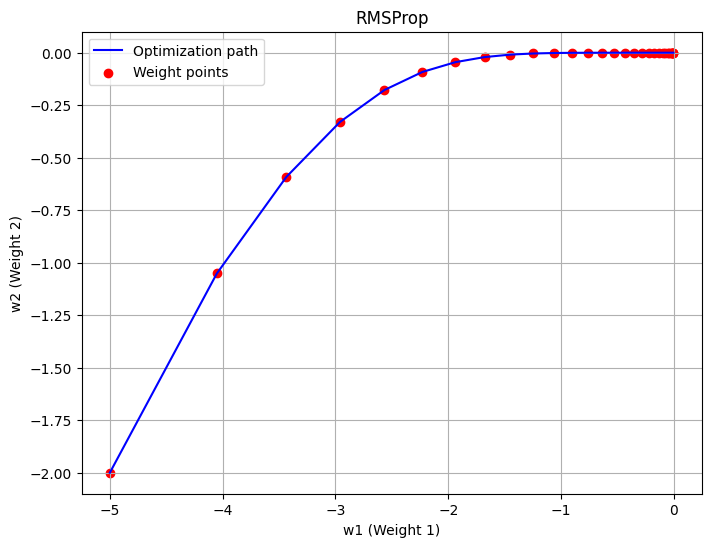

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def plot_optimization_path(results):
    """
    Plot the optimization path showing how the weights change during training.
    
    Arguments:
    results -- list: A list of weight pairs [w1, w2] from the optimizer
    """
    # Extract w1 and w2 values
    w1_values = [res[0] for res in results]
    w2_values = [res[1] for res in results]

    # Plot the path of optimization with lines and scatter points for the circles
    plt.figure(figsize=(8, 6))
    
    # Plot the line connecting the points
    plt.plot(w1_values, w2_values, linestyle='-', color='b', label="Optimization path")
    
    # Plot circles at each point 
    plt.scatter(w1_values, w2_values, color='r', marker='o', label="Weight points")
    
    # Add labels and title
    plt.xlabel('w1 (Weight 1)')
    plt.ylabel('w2 (Weight 2)')
    plt.title('RMSProp')
    plt.grid(True)
    plt.legend()
    
    # Show the plot
    plt.show()

# Plot the optimization patha
plot_optimization_path(results)